In [170]:
import numpy as np
import pandas as pd

df = pd.read_csv('all-ratios-quarterly.csv')

In [171]:
df.head()

,Ticker,Unnamed: 1,12/31/1995,3/31/1996,6/30/1996,9/30/1996,12/31/1996,3/31/1997,6/30/1997,9/30/1997,...,6/30/2022,9/30/2022,12/31/2022,3/31/2023,6/30/2023,9/30/2023,12/31/2023,3/31/2024,6/30/2024,9/30/2024
0,ALL,Market Capitalization,NaN,NaN,NaN,NaN,25521,26183,31761,34863,...,34849,33660,35962,29180,28661,29142,36631,45513,42137,50877
1,ALL,Market Cap Growth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-10.75%,-10.58%,6.63%,-24.31%,-17.75%,-13.42%,1.86%,55.98%,47.02%,47.02%
2,ALL,Enterprise Value,1138,NaN,NaN,NaN,26791,27386,32990,36169,...,42053,40841,43190,36970,35911,36228,43851,52601,49620,60343
3,ALL,PE Ratio,NaN,NaN,NaN,NaN,12.3,10.83,13.83,12.32,...,38.42,-117.69,-25.8,-12.29,-10.53,-14.02,-115.92,37.34,14.49,17.53
4,ALL,PS Ratio,NaN,NaN,NaN,NaN,1.05,1.07,1.31,1.41,...,0.7,0.66,0.7,0.55,0.53,0.52,0.64,0.78,0.7,0.84


In [172]:
df_long = df.melt(id_vars=['Ticker', 'Unnamed: 1'], var_name='Date', value_name='Value')
df_long.columns = ['Ticker', 'Metric', 'Date', 'Value']
df_long['Date'] = pd.to_datetime(df_long['Date'], format='%m/%d/%Y')
df_long = df_long.sort_values(by=['Ticker', 'Date']).dropna().reset_index()

In [173]:
df_long

,index,Ticker,Metric,Date,Value
0,2,ALL,Enterprise Value,1995-12-31,1138
1,8,ALL,Debt / Equity Ratio,1995-12-31,0.1
2,11,ALL,Dividend Yield,1995-12-31,1.90%
3,14,ALL,Total Shareholder Return,1995-12-31,1.90%
4,24,ALL,Interest Coverage,1996-03-31,23.91
...,...,...,...,...,...
1686,1734,ALL,Interest Coverage,2024-09-30,10.5
1687,1736,ALL,Dividend Yield,2024-09-30,1.91%
1688,1737,ALL,Payout Ratio,2024-09-30,33.46%
1689,1738,ALL,Buyback Yield / Dilution,2024-09-30,0.17%


In [174]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
interest_coverage_data = df_long[df_long['Metric'] == 'Interest Coverage']
interest_coverage_data = interest_coverage_data.sort_values('Date')

# Step 3: Set Date as the index
interest_coverage_data.set_index('Date', inplace=True)

# Step 4: Select the Ticker you want to forecast (e.g., 'ALL')
ticker_data = interest_coverage_data[interest_coverage_data['Ticker'] == 'ALL']['Value']

# Convert the Value column to numeric
ticker_data = pd.to_numeric(ticker_data, errors='coerce')

ticker_data


Date
1996-03-31    23.91
1996-06-30    44.75
1996-09-30    13.63
1996-12-31    34.92
1997-03-31    46.17
              ...  
2023-09-30     0.75
2023-12-31    18.09
2024-03-31    16.30
2024-06-30     5.22
2024-09-30    10.50
Name: Value, Length: 115, dtype: float64

In [175]:
#Step 5: figure out the best p, d and q for the ARIMA model
import itertools
import statsmodels.api as sm

# Define the range for p, d, q
p = d = q = range(0, 3)

# Create combinations of p, d, q
pdq = list(itertools.product(p, d, q))

# Time series data (assume data is a pandas series)
aic_values = []
for param in pdq:
    try:
        model = sm.tsa.ARIMA(ticker_data, order=param)
        results = model.fit()
        aic_values.append((param, results.aic))
    except:
        continue
print(aic_values)
# Get the combination with the lowest AIC
best_param = sorted(aic_values, key=lambda x: x[1])[0]
print('Best ARIMA order:', best_param)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QE-DEC will be used.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QE-DEC will be used.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QE-DEC will be used.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QE-DEC will be used.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QE-DEC will be used.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No 

[((0, 0, 0), 944.430613390277), ((0, 0, 1), 916.6153976051045), ((0, 0, 2), 903.4517722105782), ((0, 1, 0), 908.117720565154), ((0, 1, 1), 875.7568859866681), ((0, 1, 2), 877.6800833807629), ((0, 2, 0), 1020.1107217813194), ((0, 2, 1), 907.8961590585672), ((0, 2, 2), 877.3476948818745), ((1, 0, 0), 894.4832367809448), ((1, 0, 1), 882.4660093032139), ((1, 0, 2), 883.8724270868363), ((1, 1, 0), 884.5097796489405), ((1, 1, 1), 877.683509467714), ((1, 1, 2), 879.6694665726276), ((1, 2, 0), 958.1224640322386), ((1, 2, 1), 885.1924567153712), ((1, 2, 2), 879.2251530613729), ((2, 0, 0), 885.1916413646868), ((2, 0, 1), 884.0289071815347), ((2, 0, 2), 883.7918774517831), ((2, 1, 0), 880.5704089490266), ((2, 1, 1), 879.1116701394925), ((2, 1, 2), 880.6984931388154), ((2, 2, 0), 936.3841569073302), ((2, 2, 1), 881.6857823039326), ((2, 2, 2), 887.1404993513811)]
Best ARIMA order: ((0, 1, 1), 875.7568859866681)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QE-DEC will be used.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QE-DEC will be used.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QE-DEC will be used.

C:\Users\alexv\AppData\Local\Temp\ipykernel_22380\3689064063.py:15: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.



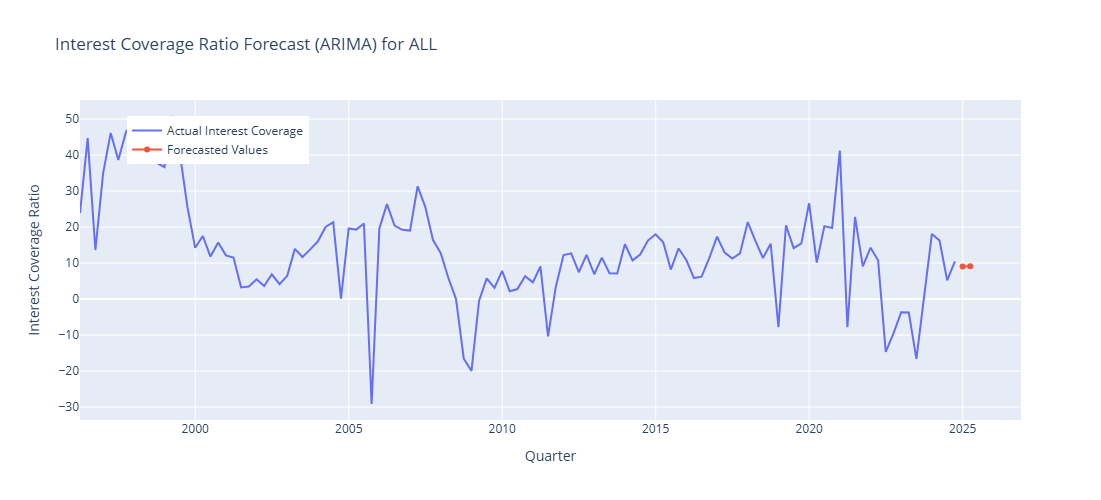

In [176]:
import plotly.graph_objects as go
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming ticker_data is your time series (Pandas Series or DataFrame with a datetime index)

# Step 6: Fit the ARIMA model with a determined order (p=1, d=1, q=1 in this example)
model = ARIMA(ticker_data, order=(1, 1, 1))  # Adjust p, d, q as needed
fitted_model = model.fit()

# Step 7: Forecast for 2 periods ahead (for Q4 2024 and Q1 2025)
forecast = fitted_model.forecast(steps=2)

# Create a date range for the forecasted periods (2 quarters ahead)
forecast_dates = pd.date_range(ticker_data.index[-1], periods=3, freq='Q')[1:]

# Step 8: Plot using Plotly
fig = go.Figure()

# Plot actual data
fig.add_trace(go.Scatter(x=ticker_data.index, y=ticker_data, mode='lines', name='Actual Interest Coverage'))

# Plot forecasted values
fig.add_trace(go.Scatter(x=forecast_dates, y=forecast, mode='lines+markers', name='Forecasted Values'))

# Add labels and title
fig.update_layout(
    title='Interest Coverage Ratio Forecast (ARIMA) for ALL',
    xaxis_title='Quarter',
    yaxis_title='Interest Coverage Ratio',
    legend=dict(x=0.05, y=0.95, traceorder='normal'),
    autosize=False,
    width=800,
    height=500
)

# Show the plot
fig.show()

In [177]:
# Step 8: Print the forecasted value for 2025
print(forecast)

2024-12-31    9.039700
2025-03-31    9.109271
Freq: QE-DEC, Name: predicted_mean, dtype: float64
